# Project
Data Source: https://www.kaggle.com/worldbank/world-development-indicators
<br>Folder: 'world-development-indicators'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Indicators.csv')

### Detect the columns:

In [3]:
data.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [4]:
new_data = data[['CountryName', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']]

### Select data about Brazil

In [5]:
brazil = new_data['CountryName'].str.contains('Brazil')

In [6]:
brazil_data = new_data[brazil]

### Select info about Death Rate

In [7]:
death_rate = brazil_data['IndicatorCode'].str.contains('SP.DYN.CDRT.IN')
brazil_dr = brazil_data[death_rate]
brazil_dr.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5649,Brazil,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,13.410
29730,Brazil,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1961,13.093
56767,Brazil,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1962,12.762
85155,Brazil,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1963,12.419
113867,Brazil,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1964,12.066


### GDP per capita

In [34]:
gdp = brazil_data['IndicatorCode'].str.contains('NY.GDP.PCAP.CD')
brazil_gdp = brazil_data[gdp]
brazil_gdp.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5682,Brazil,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,209.198785
29766,Brazil,GDP per capita (current US$),NY.GDP.PCAP.CD,1961,203.955154
56807,Brazil,GDP per capita (current US$),NY.GDP.PCAP.CD,1962,258.757669
85195,Brazil,GDP per capita (current US$),NY.GDP.PCAP.CD,1963,290.058284
113907,Brazil,GDP per capita (current US$),NY.GDP.PCAP.CD,1964,259.466969


### Life Expectancy

In [9]:
life_expec = brazil_data['IndicatorCode'].str.contains('SP.DYN.LE00.IN')
brazil_ls = brazil_data[life_expec]
brazil_ls.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5736,Brazil,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,54.205463
29829,Brazil,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,54.718707
56872,Brazil,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,55.235659
85260,Brazil,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,55.751390
113972,Brazil,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,56.262951


### Checking the shape of arrays

In [10]:
brazil_dr.shape, brazil_gdp.shape, brazil_ls.shape

((54, 5), (55, 5), (54, 5))

### Cleaning the data

In [11]:
for year in brazil_gdp['Year']:
    if year not in brazil_dr['Year'].values:
        brazil_gdp = brazil_gdp[brazil_gdp.Year != year]

brazil_gdp.shape

(54, 5)

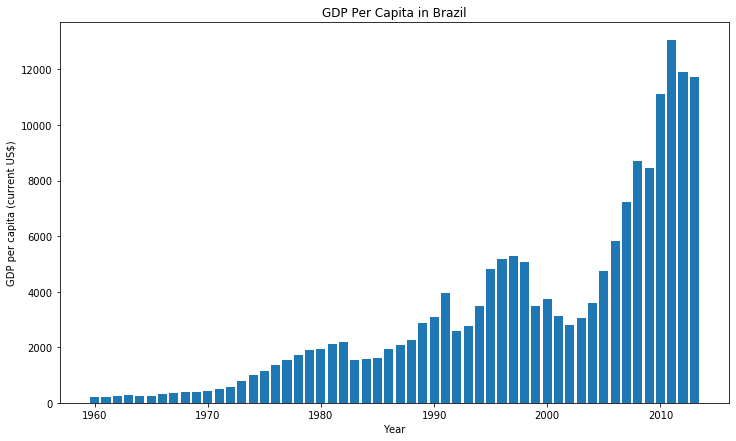

In [32]:
plt.bar(brazil_gdp['Year'].values, brazil_gdp['Value'].values)
plt.xlabel('Year')
plt.ylabel(brazil_gdp['IndicatorName'].iloc[0])
plt.title('GDP Per Capita in Brazil')
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

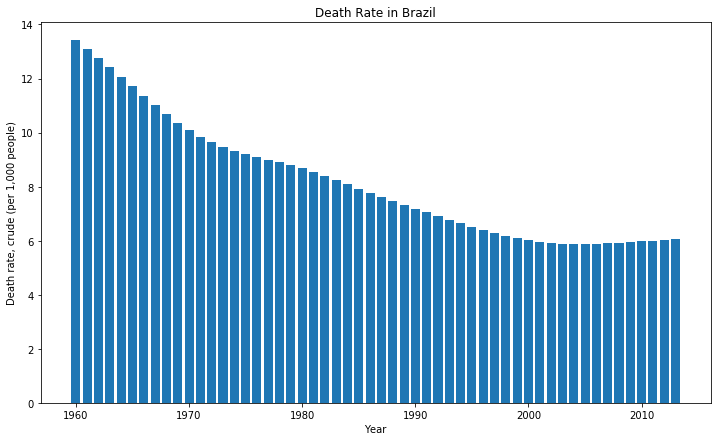

In [31]:
plt.bar(brazil_dr['Year'].values, brazil_dr['Value'].values)
plt.xlabel('Year')
plt.ylabel(brazil_dr['IndicatorName'].iloc[0])
plt.title('Death Rate in Brazil')
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

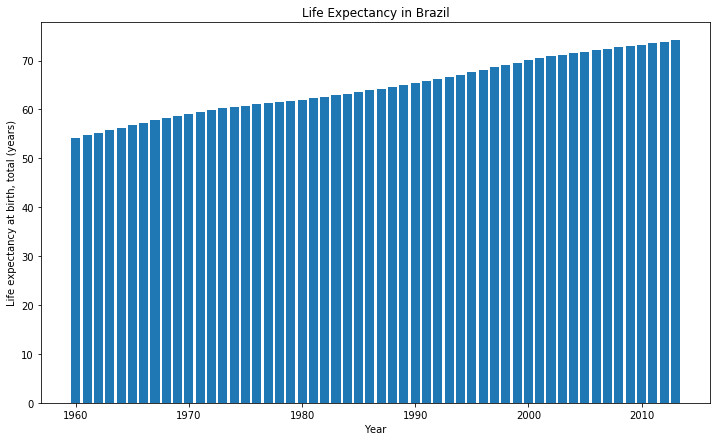

In [30]:
plt.bar(brazil_ls['Year'].values, brazil_ls['Value'].values)
plt.xlabel('Year')
plt.ylabel(brazil_ls['IndicatorName'].iloc[0])
plt.title('Life Expectancy in Brazil')
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

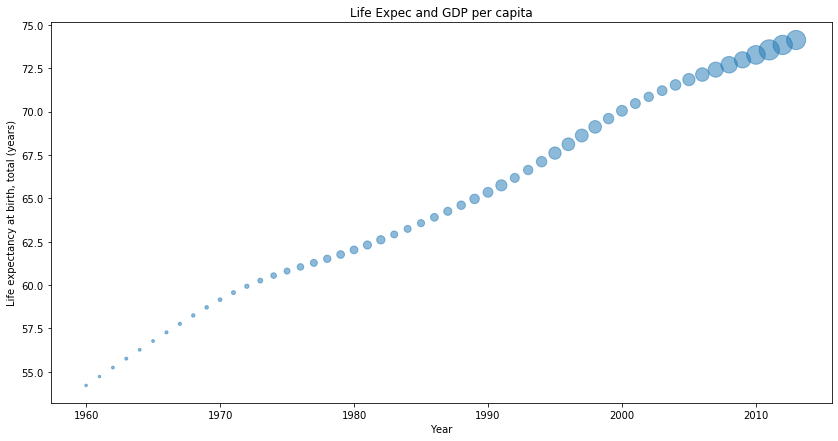

In [29]:
n = brazil_gdp['Value'].values 
area = np.pi * (n/100)
plt.xlabel('Year')
plt.ylabel(brazil_ls['IndicatorName'].iloc[0])
plt.title('Life Expec and GDP per capita')
plt.scatter(brazil_ls['Year'].values, brazil_ls['Value'].values, s=area, alpha=0.5)
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

### Filter GDP for all countries

In [45]:
gdp = new_data['IndicatorCode'].str.contains('NY.GDP.PCAP.CD')
gdp = new_data[gdp]
gdp

,CountryName,IndicatorName,IndicatorCode,Year,Value
95,Caribbean small states,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,457.464712
264,East Asia & Pacific (all income levels),GDP per capita (current US$),NY.GDP.PCAP.CD,1960,146.814138
377,East Asia & Pacific (developing only),GDP per capita (current US$),NY.GDP.PCAP.CD,1960,89.319639
518,Euro area,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,924.571393
624,Europe & Central Asia (all income levels),GDP per capita (current US$),NY.GDP.PCAP.CD,1960,648.223441
836,European Union,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,876.477907
1004,Heavily indebted poor countries (HIPC),GDP per capita (current US$),NY.GDP.PCAP.CD,1960,107.416655
1127,High income,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,1240.385955
1327,High income: OECD,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,1448.142479
1437,Latin America & Caribbean (all income levels),GDP per capita (current US$),NY.GDP.PCAP.CD,1960,367.811643


### Only 2014

In [51]:
gdp_2014 = gdp['Year'] == 2014
last_gdp = gdp[gdp_2014]
last_gdp.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5534379,Arab World,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,7386.428444
5534630,Caribbean small states,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,10164.320958
5534889,Central Europe and the Baltics,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,14086.521810
5535236,East Asia & Pacific (all income levels),GDP per capita (current US$),NY.GDP.PCAP.CD,2014,9475.349629
5535537,East Asia & Pacific (developing only),GDP per capita (current US$),NY.GDP.PCAP.CD,2014,6240.403751


### Select the highest GDP

In [57]:
higher = last_gdp.nlargest(10, 'Value')
higher

,CountryName,IndicatorName,IndicatorCode,Year,Value
5597012,Luxembourg,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,116664.262488
5611102,Norway,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,97307.421592
5616619,Qatar,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,96732.402545
5597423,"Macao SAR, China",GDP per capita (current US$),NY.GDP.PCAP.CD,2014,96038.050724
5629386,Switzerland,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,85594.326601
5550131,Australia,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,61925.496062
5570049,Denmark,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,60707.249365
5628914,Sweden,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,58938.772748
5622220,Singapore,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,56284.578405
5637326,United States,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,54629.495168


### Select the lowest GDP

In [59]:
lowest = last_gdp.nsmallest(10, 'Value')
lowest

,CountryName,IndicatorName,IndicatorCode,Year,Value
5599014,Malawi,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,255.044570
5560069,Burundi,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,286.002336
5562854,Central African Republic,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,358.537836
5609956,Niger,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,427.373240
5566215,"Congo, Dem. Rep.",GDP per capita (current US$),NY.GDP.PCAP.CD,2014,442.339539
5598449,Madagascar,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,449.400830
5595758,Liberia,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,457.858587
5581375,Guinea,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,539.615775
5623991,Somalia,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,542.615884
5581902,Guinea-Bissau,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,567.822610
